# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the  Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` and `VacationPy.ipynb`. These will be the main scripts to run for each analysis.

5. Push the above changes to GitHub.

## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is analyzing, any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [168]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city

#list and record checker
record = 0
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windspeed = []


#append lists for reach city found and print found status
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')
    if record >= 50:
        break
    time.sleep(1)

    
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':windspeed}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

Processing Record 1: ust-nera
Processing Record 2: hilo
Processing Record 3: sabancuy
Processing Record 4: beringovskiy
Processing Record 5: tuktoyaktuk
Processing Record 6: nanortalik
Processing Record 7: aklavik
Processing Record 8: vaini
Processing Record 9: faanui
Processing Record 10: saldanha
Processing Record 11: kavieng
Processing Record 12: huarmey
Processing Record 13: sitka
City not found. Skipping...
Processing Record 15: rikitea
Processing Record 16: conde
Processing Record 17: ahipara
Processing Record 18: kahului
Processing Record 19: makakilo city
Processing Record 20: chokurdakh
Processing Record 21: cape town
Processing Record 22: kapaa
Processing Record 23: tasiilaq
Processing Record 24: ushuaia
Processing Record 25: bethel
Processing Record 26: tongliao
Processing Record 27: bay roberts
Processing Record 28: thompson
Processing Record 29: hamilton
Processing Record 30: nikolskoye
Processing Record 31: port elizabeth
Processing Record 32: mahajanga
City not found. Sk

In [169]:
# export dataframe to csv
export_csv = weather_df.to_csv (output_data_file, index = None, header=True)
# counts for Dataframe
weather_df.count()

City          46
Cloudiness    46
Country       46
Date          46
Humidity      46
Lat           46
Lng           46
Max Temp      46
Wind Speed    46
dtype: int64

In [170]:
# display Dataframe head
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ust-Nera,0,RU,1569443209,81,64.57,143.24,19.02,3.58
1,Hilo,40,US,1569443208,58,19.71,-155.08,86.00,4.70
2,Sabancuy,5,MX,1569443211,77,18.97,-91.18,84.17,10.89
3,Beringovskiy,94,RU,1569443212,68,63.05,179.32,38.50,7.90
4,Tuktoyaktuk,75,CA,1569443213,86,69.44,-133.03,41.00,4.70
5,Nanortalik,0,GL,1569443215,84,60.14,-45.24,41.60,1.54
6,Aklavik,20,CA,1569443216,75,68.22,-135.01,41.00,2.24
7,Vaini,100,IN,1569443217,95,15.34,74.49,75.29,2.33
8,Faanui,59,PF,1569443218,77,-16.48,-151.75,79.09,14.61
9,Saldanha,100,PT,1569443220,65,41.42,-6.55,61.40,4.45


## Data Scatterplots

#### Latitude vs. Temperature Plot

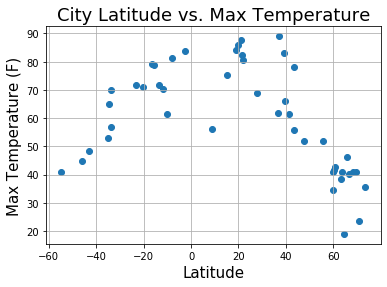

<Figure size 720x720 with 0 Axes>

In [171]:
lat_temp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'])
plt.grid()
plt.title('City Latitude vs. Max Temperature',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and temperature in the selected cities. As shown, the trend is

#### Latitude vs. Humidity Plot

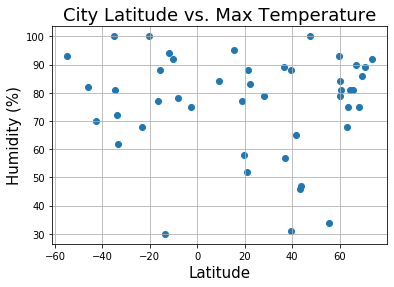

<Figure size 720x720 with 0 Axes>

In [172]:
lat_hum_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'])
plt.grid()
plt.title('City Latitude vs. Max Temperature',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and humidity in the selected cities. As shown, the trend is

#### Latitude vs. Cloudiness Plot

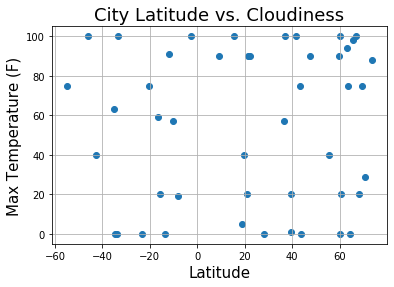

<Figure size 720x720 with 0 Axes>

In [173]:
lat_cloud_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'])
plt.grid()
plt.title('City Latitude vs. Cloudiness',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and cloudiness in the selected cities. As shown, the trend is

#### Latitude vs. Wind Speed Plot

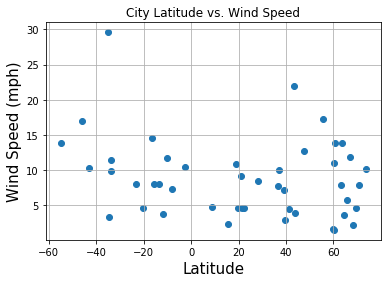

<Figure size 720x720 with 0 Axes>

In [174]:
lat_ws_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'])
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and wind speed in the selected cities. As shown, the trend is

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

### Max Temp vs. Latitutde Linear Regression Comparison
* 1
* 2
* 3

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


### Humidity vs. Latitutde Linear Regression Comparison
* 1
* 2
* 3

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

### Cloudiness vs. Latitutde Linear Regression Comparison
* 1
* 2
* 3

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

### Wind Speed (mph) vs. Latitutde Linear Regression Comparison
* 1
* 2
* 3